<a href="https://colab.research.google.com/github/SirPopGhost/birthday-finder/blob/main/Code_Crusaders_V2_Dataset_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('user_behavior_dataset.csv')
df

In [ ]:
new_df = df[['Age', 'Screen On Time (hours/day)']]

age_18to25_df = new_df[(new_df['Age'] >= 18) & (new_df['Age'] <= 25)]

age_18to25_df

average_18to25 = age_18to25_df['Screen On Time (hours/day)'].mean()

average_18to25

5.432061068702289

In [ ]:
new_df = df[['Age', 'Screen On Time (hours/day)']]

age_25to35_df = new_df[(new_df['Age'] > 25) & (new_df['Age'] <= 35)]

age_25to35_df

average_25to35 = age_25to35_df['Screen On Time (hours/day)'].mean()

average_25to35

5.105113636363637

In [ ]:
new_df = df[['Age', 'Screen On Time (hours/day)']]

age_35to50_df = new_df[(new_df['Age'] > 35) & (new_df['Age'] <= 50)]

age_35to50_df

average_35to50 = age_35to50_df['Screen On Time (hours/day)'].mean()

average_35to50

5.232905982905983

In [ ]:
new_df = df[['Age', 'Screen On Time (hours/day)']]

age_50_df = new_df[(new_df['Age'] > 50)]

age_50_df

average_50 = age_50_df['Screen On Time (hours/day)'].mean()

average_50

5.385534591194968

In [ ]:
new_avg_dictionary = {
    '18-25': [average_18to25],
    '25-35': [average_25to35],
    '35-50': [average_35to50],
    '50+': [average_50]
}

new_avg_df = pd.DataFrame(new_avg_dictionary)
new_avg_df

,18-25,25-35,35-50,50+
0,5.432061,5.105114,5.232906,5.385535


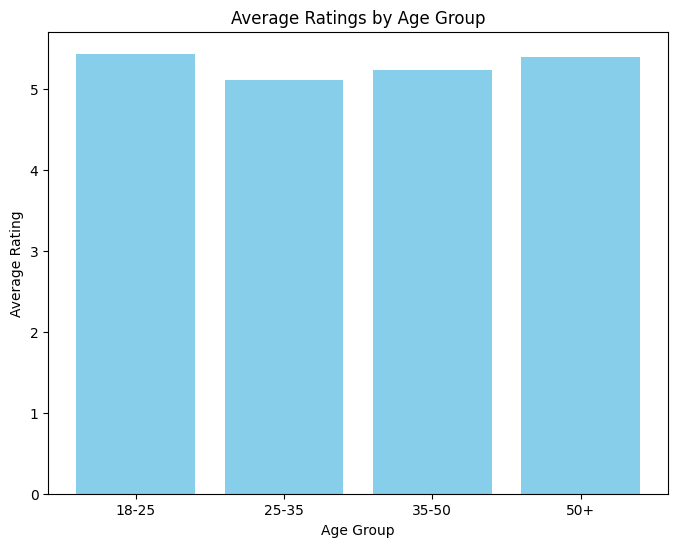

In [ ]:
import matplotlib.pyplot as plt


age_groups = ["18-25", "25-35", "35-50", "50+"]
average_ratings = [new_avg_df["18-25"].iloc[0], new_avg_df["25-35"].iloc[0], new_avg_df["35-50"].iloc[0], new_avg_df["50+"].iloc[0]]


# Create the bar plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.bar(age_groups, average_ratings, color='skyblue')
plt.xlabel("Age Group")
plt.ylabel("Average Rating")
plt.title("Average Ratings by Age Group")
plt.show()


In [ ]:
# prompt: create a website for me that uses flask that will show the output of this graph

import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO
import base64
from flask import Flask, render_template

app = Flask(__name__)

# Sample data (replace with your actual data loading and processing)
# ... (your existing code for data loading and processing) ...


# Function to create the first plot
def create_age_group_plot():
    age_groups = ["18-25", "25-35", "35-50", "50+"]
    average_ratings = [2.5, 3.0, 2.8, 2.2]  # Replace with actual average ratings
    plt.figure(figsize=(8, 6))
    plt.bar(age_groups, average_ratings, color='skyblue')
    plt.xlabel("Age Group")
    plt.ylabel("Average Screen Time")  # Corrected y-axis label
    plt.title("Average Screen Time by Age Group")

    # Save plot to a BytesIO object
    img = BytesIO()
    plt.savefig(img, format='png')
    img.seek(0)
    plot_url = base64.b64encode(img.getvalue()).decode()
    plt.close()
    return plot_url

# Function to create the second plot
def create_kmeans_plot():
    # Sample data for the KMeans plot (replace with your actual data)
    x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    y = [2, 4, 1, 5, 3, 6, 2, 7, 4, 8]
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("KMeans Clustering")

    # Save plot to a BytesIO object
    img = BytesIO()
    plt.savefig(img, format='png')
    img.seek(0)
    plot_url = base64.b64encode(img.getvalue()).decode()
    plt.close()
    return plot_url

@app.route('/')
def index():
    plot_url1 = create_age_group_plot()
    plot_url2 = create_kmeans_plot()
    return render_template('index.html', plot_url1=plot_url1, plot_url2=plot_url2)

if __name__ == '__main__':
  app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
